# Balanced model using Julia

## Code is adapted from Litwin-Kumar & Doiron, 2012

Taku Ito
07/12/2019

In [536]:
using Statistics
using PyPlot

In [537]:
include("sim_tito2.jl")

sim (generic function with 1 method)

# Set parameters

In [538]:
# Dynamic parameters
taue  = 15.0
taui = 10.0



# Construct network and synaptic connections
Ne = 4000
Ni = 1000
Nepop = 80 # cluster sizer (for E-E connections)
# Connectivity probabilities
pee = .2
pei = .5 
pie = .5
pii = .5
ree = 2.5 # Clustering coef
K = Ne*pee # Average number of E-E connections
# Synaptic efficacies
jeeout = 10.0 / (taue * sqrt(K))
jeein = 1.9 * 10.0 / (taue * sqrt(K))
jie = 4.0 / (sqrt(K) * taui)
jei = -16.0 * 1.2 / (taue * sqrt(K))
jii = -16.0 / (taui * sqrt(K))

@time W = constructMatrices(jeeout, jeein, jie, jei, jii, Ne=Ne, Ni=Ni, Nepop=Nepop, pee=pee, pei=pei, pie=pie, pii=pii, ree=ree);

  0.646931 seconds (267.88 k allocations: 590.891 MiB, 15.44% gc time)


# Simulate spontaneous dynamics

In [539]:
# include("sim_tito2.jl")

time = 2000 #ms
dt = 0.1 #ms
vre = 0.
threshe = 1
threshi = 1

tauerise = 1
tauedecay = 3 #formerly 3
tauirise = 1.5
tauidecay = 4 #formerly 2

# muemin = 1.1 
# muemax = 1.2 
# muimin = 1.0
# muimax = 1.05
muemin = 1.1
muemax = 1.2
muimin = 1.05
muimax = 1.15


refrace = 5
refraci = 1

Nstim = 400
stimamp = 0.0
stimstart = 0
stimend = 2000

outputfilename = "/projects3/TaskFCMech/data/results/spikingModel/balanced_simoutput_spontaneous.h5"


@time times_spont, ns_spont, Ne, Ncells, T, spikes_spont, synInput_spont = sim(W, Ne=Ne, Ni=Ni, T=time, dt=dt, 
                                                                               vre=vre, threshe=threshe, threshi=threshi, taue=taue, taui=taui,
                                                                               tauerise=tauerise, tauedecay=tauedecay, tauirise=tauirise, tauidecay=tauidecay,
                                                                               muemin=muemin, muemax=muemax, muimin=muimin, muimax=muimax,
                                                                               Nstim=Nstim, stimamp=stimamp, stimstart=stimstart, stimend=stimend,
                                                                               refrace=refrace, refraci=refraci, save=true, filename=outputfilename, overwrite=true);

# Print out mean firing rates
println("mean excitatory firing rate: ", mean(1000*ns_spont[1:Ne]/T)," Hz")
println("mean inhibitory firing rate: ", mean(1000*ns_spont[(Ne+1):Ncells]/T)," Hz")

setting up parameters
starting simulation
Saving output to HDF5 file:/projects3/TaskFCMech/data/results/spikingModel/balanced_simoutput_spontaneous.h5
overwriting previous file...
  5.032563 seconds (405.76 k allocations: 3.008 GiB, 3.25% gc time)
mean excitatory firing rate: 1.3235 Hz
mean inhibitory firing rate: 2.42 Hz


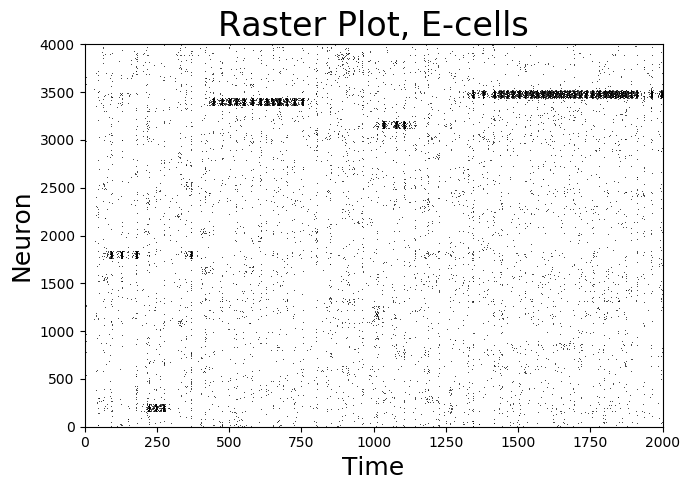

creating raster plot


In [540]:
doplot = true
if doplot
        println("creating raster plot")
        figure(figsize=(7,5))
        title("Spontaneous state, E-cells",fontsize=24)
        for ci = 1:Ne
                vals = times_spont[ci,1:ns_spont[ci]]
                y = ci*ones(length(vals))
                scatter(vals,y,s=.3,c="k",marker="o",linewidths=0)
        end 
        xlim(0,T)
        ylim(0,Ne)
        title("Raster Plot, E-cells",fontsize=24)
        ylabel("Neuron",fontsize=18)
        xlabel("Time",fontsize=18)
        tight_layout()
#         savefig("raster.png",dpi=150)
end

creating mean firing rate


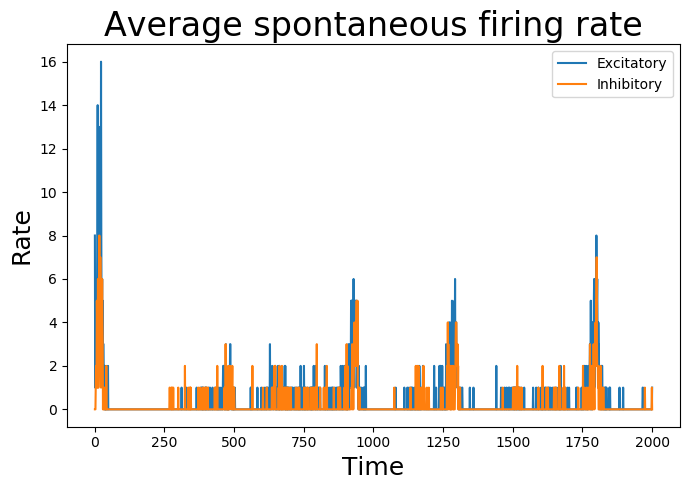

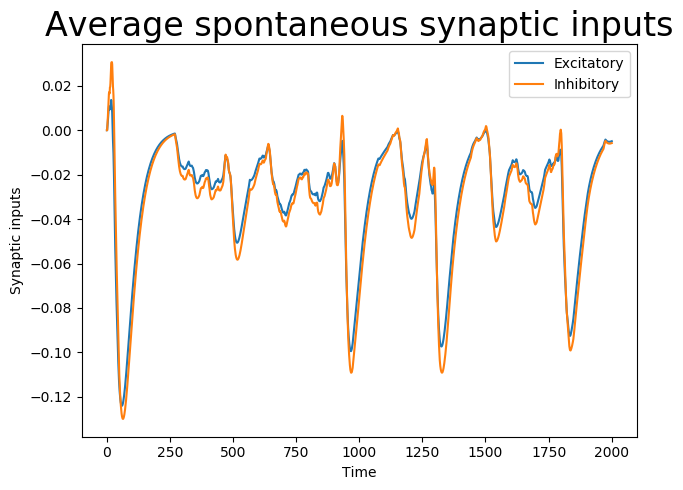

creating mean synaptic inputs


In [541]:
# Create second plot
println("creating mean firing rate")
figure(figsize=(7,5))
title("Average spontaneous firing rate",fontsize=24)
plot(range(1,stop=2000),sum(spikes_spont[1:Ne,1:2000],dims=1)[1,:],label="Excitatory")
plot(range(1,stop=2000),sum(spikes_spont[Ne+1:Ncells,1:2000],dims=1)[1,:],label="Inhibitory")
ylabel("Rate",fontsize=18)
xlabel("Time",fontsize=18)
legend()
tight_layout()
# savefig("firingrate.png",dpi=150)

# Create second plot
println("creating mean synaptic inputs")
figure(figsize=(7,5))
title("Average spontaneous synaptic inputs",fontsize=24)
plot(range(1,stop=2000),mean(synInput_spont[1:Ne,1:2000],dims=1)[1,:],label="Excitatory")
plot(range(1,stop=2000),mean(synInput_spont[Ne+1:Ncells,1:2000],dims=1)[1,:],label="Inhibitory")
ylabel("Synaptic inputs")
xlabel("Time")
legend()
tight_layout()
# savefig("synapticinput.png",dpi=150)

# Simulate task-evoked dynamics

In [542]:
# include("sim_tito2.jl")

time = 2000 #ms
dt = 0.05 #ms
vre = 0.
threshe = 1
threshi = 1

tauerise = 1
tauedecay = 3 #formerly 3
tauirise = 1.5
tauidecay = 4 #formerly 2

# muemin = 1.1 
# muemax = 1.2 
# muimin = 1.0
# muimax = 1.05
muemin = 1.1
muemax = 1.2
muimin = 1.05
muimax = 1.15


refrace = 5
refraci = 1

Nstim = 400
stimamp = 0.07
stimstart = 0
stimend = 2000

outputfilename = "/projects3/TaskFCMech/data/results/spikingModel/balanced_simoutput_evoked.h5"


@time times_evoke, ns_evoke, Ne, Ncells, T, spikes_evoke, synInput_evoke = sim(W, Ne=Ne, Ni=Ni, T=time, dt=dt, 
                                                                               vre=vre, threshe=threshe, threshi=threshi, taue=taue, taui=taui,
                                                                               tauerise=tauerise, tauedecay=tauedecay, tauirise=tauirise, tauidecay=tauidecay,
                                                                               muemin=muemin, muemax=muemax, muimin=muimin, muimax=muimax,
                                                                               Nstim=Nstim, stimamp=stimamp, stimstart=stimstart, stimend=stimend,
                                                                               refrace=refrace, refraci=refraci, save=true, filename=outputfilename, overwrite=true);
# Print out mean firing rates
println("mean excitatory firing rate: ",mean(1000*ns_evoke[1:Ne]/T)," Hz")
println("mean inhibitory firing rate: ",mean(1000*ns_evoke[(Ne+1):Ncells]/T)," Hz")

setting up parameters
starting simulation
Saving output to HDF5 file:/projects3/TaskFCMech/data/results/spikingModel/balanced_simoutput_evoked.h5
overwriting previous file...
 10.854029 seconds (171.18 k allocations: 5.980 GiB, 2.19% gc time)
mean excitatory firing rate: 2.5605 Hz
mean inhibitory firing rate: 3.7105 Hz


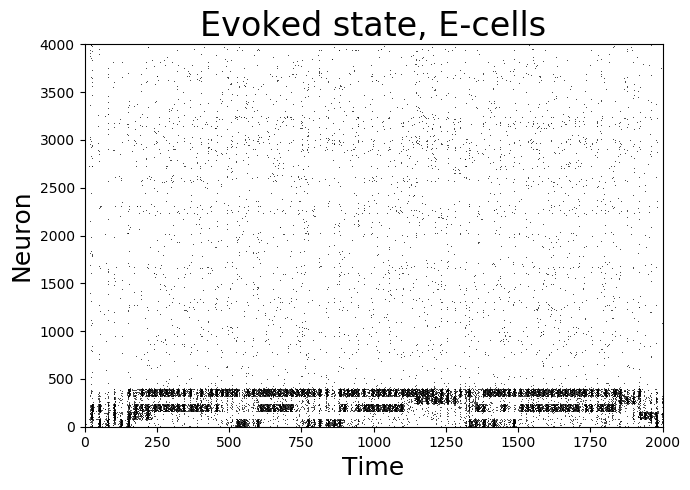

mean excitatory firing rate: 2.5605 Hz
mean inhibitory firing rate: 3.7105 Hz
creating raster plot


In [543]:
println("mean excitatory firing rate: ",mean(1000*ns_evoke[1:Ne]/T)," Hz")
println("mean inhibitory firing rate: ",mean(1000*ns_evoke[(Ne+1):Ncells]/T)," Hz")
doplot = true
if doplot
        println("creating raster plot")
        figure(figsize=(7,5))
        for ci = 1:Ne
                vals = times_evoke[ci,1:ns_evoke[ci]]
                y = ci*ones(length(vals))
                scatter(vals,y,s=.3,c="k",marker="o",linewidths=0)
        end 
        xlim(0,T)
        ylim(0,Ne)
        title("Evoked state, E-cells",fontsize=24)
        ylabel("Neuron",fontsize=18)
        xlabel("Time",fontsize=18)
        tight_layout()
#         savefig("raster.png",dpi=150)
end

creating mean firing rate


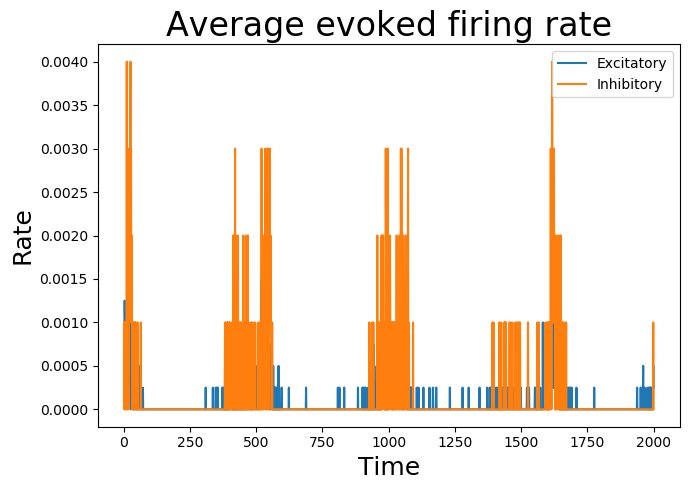

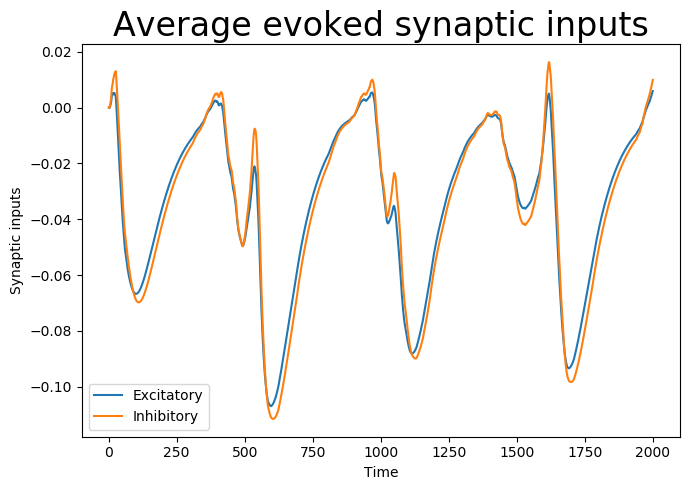

creating mean synaptic inputs


In [544]:
# Create second plot
println("creating mean firing rate")
figure(figsize=(7,5))
title("Average evoked firing rate",fontsize=24)
plot(range(1,stop=2000),mean(spikes_evoke[1:Ne,1:2000],dims=1)[1,:],label="Excitatory")
plot(range(1,stop=2000),mean(spikes_evoke[Ne+1:Ncells,1:2000],dims=1)[1,:],label="Inhibitory")
ylabel("Rate",fontsize=18)
xlabel("Time",fontsize=18)
legend()
tight_layout()
# savefig("firingrate.png",dpi=150)

# Create second plot
println("creating mean synaptic inputs")
figure(figsize=(7,5))
title("Average evoked synaptic inputs",fontsize=24)
plot(range(1,stop=2000),mean(synInput_evoke[1:Ne,1:2000],dims=1)[1,:],label="Excitatory")
plot(range(1,stop=2000),mean(synInput_evoke[Ne+1:Ncells,1:2000],dims=1)[1,:],label="Inhibitory")
ylabel("Synaptic inputs")
xlabel("Time")
legend()
tight_layout()
# savefig("synapticinput.png",dpi=150)